Path: [(0, 0), (0, 1), (1, 1), (2, 1), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (5, 5)]
Cost: 12


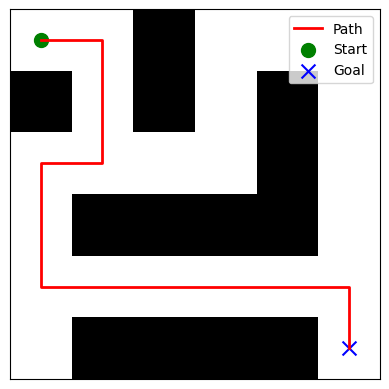

In [1]:
 import heapq
import matplotlib.pyplot as plt
import numpy as np

# -------------------------
# Maze and Start/Goal
# -------------------------
# maze = [
#     ['A', 0, 1, 0, 0],
#     [1, 0, 1, 0, 1],
#     [0, 0, 0, 0, 0],
#     [0, 1, 1, 1, 0],
#     [0, 0, 0, 0, 'B']
# ]
# maze = [
#     ['A', 0,  1,  0,  0,  0, 1, 0, 0, 1, 0, 0],
#     [0,   0,  1,  0,  1,  0, 1, 0, 1, 0, 0, 0],
#     [1,   0,  0,  0,  1,  0, 0, 0, 1, 1, 1, 0],
#     [0,   1,  1,  0,  0,  1, 1, 0, 0, 0, 1, 0],
#     [0,   0,  0,  0,  1,  0, 1, 1, 1, 0, 0, 0],
#     [1,   1,  1,  0,  1,  0, 0, 0, 1, 1, 1, 0],
#     [0,   0,  1,  0,  0,  0, 1, 0, 0, 0, 1, 0],
#     [0,   1,  0,  1,  1,  0, 1, 1, 1, 0, 1, 0],
#     [0,   0,  0,  0,  0,  0, 0, 0, 1, 0, 0, 0],
#     [1,   1,  1,  1,  1,  1, 0, 1, 0, 1, 1, 0],
#     [0,   0,  0,  0,  0,  0, 0, 1, 0, 0, 0, 0],
#     [0,   1,  1,  1,  1,  1, 1, 1, 1, 1, 1,'B'],
# ]
  
maze = [
    ['A', 0,   1,  0, 0, 0],
    [1,   0,   1,  0, 1, 0],
    [0,   0,   0,  0, 1, 0],
    [0,   1,   1,  1, 1, 0],
    [0,   0,   0,  0, 0, 0],
    [0,   1,   1,  1, 1,'B'],
]

# Find start and goal positions
start = goal = None
for i in range(len(maze)):
    for j in range(len(maze[0])):
        if maze[i][j] == 'A':
            start = (i,j)
            maze[i][j] = 0
        elif maze[i][j] == 'B':
            goal = (i,j)
            maze[i][j] = 0

# -------------------------
# Manhattan Distance without abs()
# -------------------------
def manhattan(a, b):
    dx = a[0] - b[0]
    dy = a[1] - b[1]
    if dx < 0: dx = -dx
    if dy < 0: dy = -dy
    return dx + dy

# -------------------------
# A* Search Algorithm
# -------------------------
def a_star_search(maze, start, goal, heuristic=manhattan):
    rows, cols = len(maze), len(maze[0])
    open_set = []
    heapq.heappush(open_set, (heuristic(start, goal), 0, start, [start]))
    visited = set()

    while open_set:
        f, g, current, path = heapq.heappop(open_set)
        if current in visited:
            continue
        visited.add(current)

        if current == goal:
            return path, g

        x, y = current
        for dx, dy in [(-1,0),(1,0),(0,-1),(0,1)]:
            nx, ny = x+dx, y+dy
            if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] == 0:
                heapq.heappush(open_set, (
                    g+1 + heuristic((nx,ny), goal),
                    g+1,
                    (nx, ny),
                    path + [(nx, ny)]
                ))
    return None, None

# -------------------------
# Run A*
# -------------------------
path, cost = a_star_search(maze, start, goal)
print("Path:", path)
print("Cost:", cost)

# -------------------------
# Visualization using Matplotlib
# -------------------------
maze_array = np.array([[1 if cell==1 else 0 for cell in row] for row in maze])
plt.imshow(maze_array, cmap='gray_r')  # walls in black, free space in white

# Plot path
if path:
    path_x = [p[1] for p in path]
    path_y = [p[0] for p in path]
    plt.plot(path_x, path_y, color='red', linewidth=2, label="Path")

# Start and Goal markers
plt.scatter(start[1], start[0], marker='o', color='green', s=100, label='Start')
plt.scatter(goal[1], goal[0], marker='x', color='blue', s=100, label='Goal')

plt.gca().invert_yaxis() 
plt.gca().invert_xaxis()
plt.gca().invert_xaxis() 
plt.gca().invert_yaxis()# invert y-axis to match matrix layout
plt.xticks([])
plt.yticks([])
plt.legend()
plt.show()
